## Check Performance

In [ ]:
# some changes from Ilais

#TODO: ANOVA, drop MLR from memory, pairwise graphs 

## Load data
%matplotlib inline
%reload_ext autoreload
from notebooks_commons import get_raw_data

import matplotlib.pyplot as plt
from numpy import arange, var, std, mean, median
import numpy as np
import matplotlib as mpl
from scipy import stats
mpl.rc("savefig", dpi=150)

def loadData(index):
    raw = get_raw_data(index, False)
    rtx_runs = raw[0]
    rtx_data = raw[1]
    rtx_perf = raw[2]
    return {"raw":raw, "rtx_runs":rtx_runs,"rtx_data":rtx_data,"rtx_perf":rtx_perf}
    
index_random_500  = "erik-gcp-random-500cars-median" 
index_novelty_500 = "erik-gcp-novelty-500cars-median"
index_nsga2_500   = "erik-gcp-nsga2-500cars-median"
index_mlr_500     = "erik-gcp-mlr-500cars-median" 

index_random_700  = "erik-random-700cars-median" 
index_novelty_700 = "erik-noveltysearch-700cars-median"
index_nsga2_700   = "erik-nsga2-700cars-median"
index_mlr_700     = "erik-gcp-mlr-700-verify" 

index_random_800  = "erik-random-800cars-median" 
index_novelty_800 = "erik-noveltysearch-800cars-median"
index_nsga2_800   = "erik-nsga2-800cars-median"
index_mlr_800     = "erik-gcp-mlr-800-verify" 

rand_data    = {"500": loadData("erik-gcp-random-500cars-median"),    \
                "700": loadData("erik-random-700cars-median"),        \
                "800": loadData("erik-random-800cars-median")}

novelty_data = {"500": loadData("erik-gcp-novelty-500cars-median"),   \
                "700": loadData("erik-noveltysearch-700cars-median"), \
                "800": loadData("erik-noveltysearch-800cars-median")}

nsga2_data   = {"500": loadData("erik-gcp-nsga2-500cars-median"),     \
                "700": loadData("erik-nsga2-700cars-median"),         \
                "800": loadData("erik-nsga2-800cars-median")}

mlr_data     = {"500": loadData("erik-gcp-mlr-500cars-median"),       \
                "700": loadData("erik-gcp-mlr-700-verify"),           \
                "800": loadData("erik-gcp-mlr-800-verify")}

In [ ]:
import pprint
from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
pp = pprint.PrettyPrinter(indent=4)
nsga2_rtx_runs_800_median.sort(key=lambda d : d["seed"])
novelty_rtx_runs_800_median.sort(key=lambda d : d["seed"])
random_rtx_runs_800_median.sort(key=lambda d : d["seed"])
mlr_rtx_runs_800_median.sort(key=lambda d : d['seed'])
print "New runs: nsga2 [%d] random [%d] novelty [%d] mlr [%d]" % (len(nsga2_rtx_runs_800_median),len(random_rtx_runs_800_median),len(novelty_rtx_runs_800_median), len(mlr_rtx_runs_800_median))
print "Novelty iteration"
for rtx_run in novelty_rtx_runs_800_median:
    data_for_run = [d for d in novelty_data_800_median if d["parent"] == rtx_run["id"]]
    data_for_run.sort(key=lambda d : (d["_source"]["iteration"], d["_source"]["individual"]))
    printmd(str(len(data_for_run)) + "\t\t| seed " + str(rtx_run["seed"]) + " | id " + str(rtx_run["id"]), "red")
print "Random iteration"
for rtx_run in random_rtx_runs_800_median:
    data_for_run = [d for d in random_data_800_median if d["parent"] == rtx_run["id"]]
    data_for_run.sort(key=lambda d : (d["_source"]["iteration"], d["_source"]["individual"]))
    printmd(str(len(data_for_run)) + "\t\t| seed " + str(rtx_run["seed"]) + " | id " + str(rtx_run["id"]), "red")
print "NSGA2 iteration"
for rtx_run in nsga2_rtx_runs_800_median:
    data_for_run = [d for d in nsga2_data_800_median if d["parent"] == rtx_run["id"]]
    data_for_run.sort(key=lambda d : (d["_source"]["iteration"], d["_source"]["individual"]))
    printmd(str(len(data_for_run)) + "\t\t| seed " + str(rtx_run["seed"]) + " | id " + str(rtx_run["id"]), "red")
print "MLR iteration"
for rtx_run in mlr_rtx_runs_800_median:
    data_for_run = [d for d in mlr_data_800_median if d["parent"] == rtx_run["id"]]
    data_for_run.sort(key=lambda d : (d["_source"]["iteration"], d["_source"]["individual"]))
    printmd(str(len(data_for_run)) + "\t\t| seed " + str(rtx_run["seed"]) + " | id " + str(rtx_run["id"]), "red")
    
    
    
#plt.figure()
#bpl = plt.boxplot(nsga2_rtx_runs_800_median, positions=np.array(xrange(len(nsga2_rtx_runs_800_median)))*2.0-0.4, sym='', widths=0.6)
#bpr = plt.boxplot(nsga2_rtx_runs_800_median, positions=np.array(xrange(len(nsga2_rtx_runs_800_median)))*2.0+0.4, sym='', widths=0.6)

### Grouped boxplots

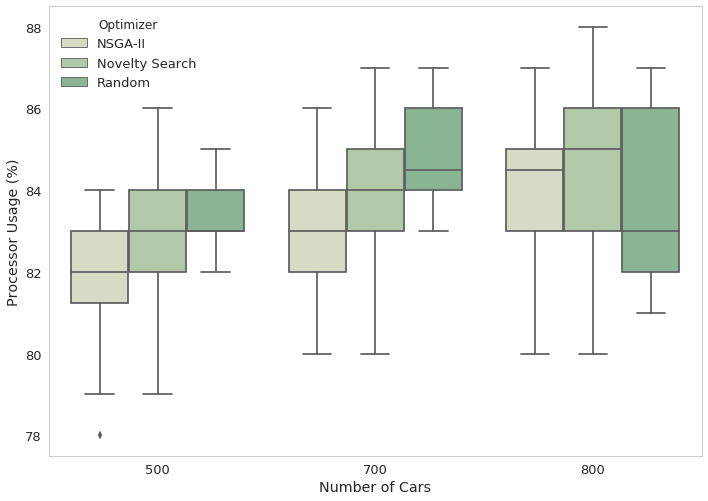

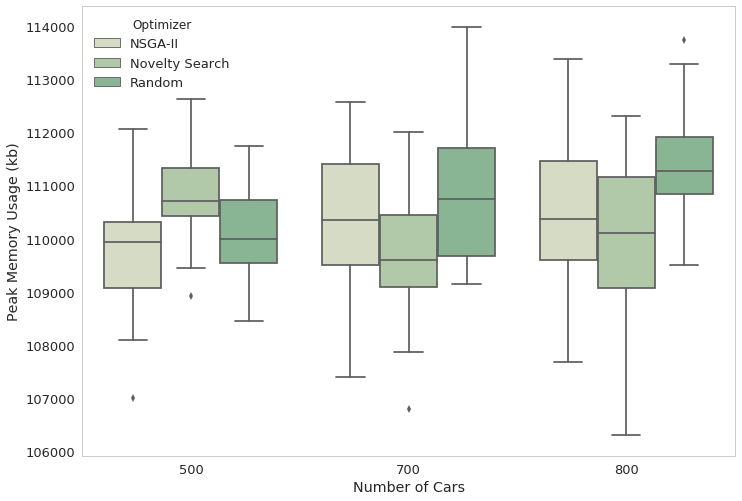

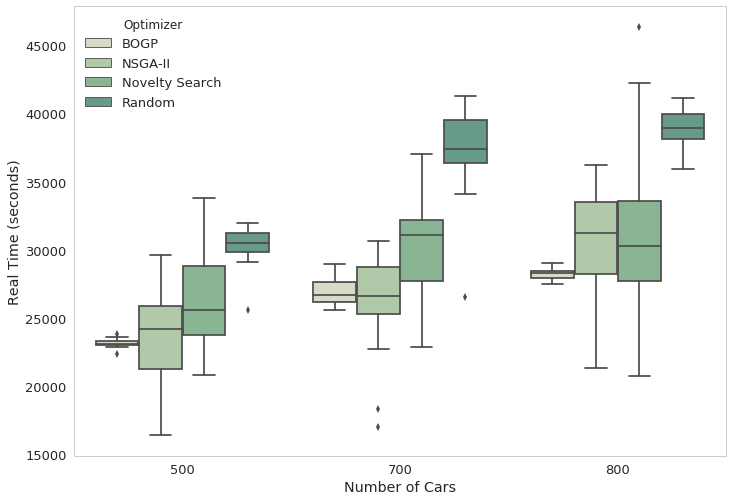

In [5]:
import seaborn as sns
import pandas as pd
#sns.set(style='darkgrid')

sns.set(font_scale=1.3)
# Palette options: https://seaborn.pydata.org/tutorial/color_palettes.html
# Set to colorblind/b&w print palette
sns.set_palette(sns.cubehelix_palette(8, start=.5, rot=-.75))
sns.set_style("whitegrid", {'axes.grid' : False})
cnts  = ['500','700','800']
ticks = ['', 'Random', 'Novelty', 'NSGA-II', 'MLR']
   
# Convert time to usable format (seconds)
from operator import mul
factors = (60*60,60,1) # 3600s per hour, 60s per minute, 1s per s
    
# Global to use for stats
rand_procs  = [[],[],[]]
ns_procs    = [[],[],[]]
nsga2_procs = [[],[],[]]
mlr_procs   = [[],[],[]]

rand_mems   = [[],[],[]]
ns_mems     = [[],[],[]]
nsga2_mems  = [[],[],[]]
mlr_mems    = [[],[],[]]
    
rand_times  = [[],[],[]]
ns_times    = [[],[],[]]
nsga2_times = [[],[],[]]
mlr_times   = [[],[],[]]   
    
def generateProcPlots(rand, novelty, nsga2, mlr):
    # Aggregate data
    i = 0
    for cnt in cnts:
        rtmp = []
        for r in rand[cnt]['rtx_perf']:
            rtmp.append(float(r['_source']['processor_usage'][:-1]))
        rand_procs[i] = rtmp
        
        ns_tmp = []
        for r in novelty[cnt]['rtx_perf']:
            ns_tmp.append(float(r['_source']['processor_usage'][:-1]))
        ns_procs[i] = ns_tmp
        
        nsga2_tmp = []
        for r in nsga2[cnt]['rtx_perf']:
            nsga2_tmp.append(float(r['_source']['processor_usage'][:-1]))
        nsga2_procs[i] = nsga2_tmp
        
        #mlr_tmp = []
        #for r in mlr[cnt]['rtx_perf']:
        #    mlr_tmp.append(float(r['_source']['processor_usage'][:-1]))
        #mlr_procs[i] = mlr_tmp
        
        i = i + 1

    # Create the dataframe in the least Pythonic way possible ...
    df = pd.DataFrame(columns=['Number of Cars','NSGA-II','Novelty Search','Random'])#,'BOGP'])
    k = 0
    for i in range(len(rand_procs[0])):
        for j in range(len(cnts)):
            df.loc[k] = [cnts[j], nsga2_procs[j][i],  \
                                  ns_procs[j][i],    \
                                  rand_procs[j][i]]#, \
                                  #mlr_procs[j][i]]
#            df.loc[k] = [cnts[j], rand_procs[j][i],  \
#                                  ns_procs[j][i],    \
#                                  nsga2_procs[j][i]]#, \
#                                  #mlr_procs[j][i]]
            k += 1
    
    # https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots
    #dd = pd.melt(df,id_vars='Number of Cars',value_vars=['Random','Novelty Search','NSGA2','BOGP'],var_name='Optimizer')
    dd = pd.melt(df,id_vars='Number of Cars',value_vars=['NSGA-II','Novelty Search','Random'],var_name='Optimizer')
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)
    sns.boxplot(x='Number of Cars',y='value',data=dd,hue='Optimizer',ax=ax)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set(ylabel='Processor Usage (%)')   
            
def generateMemPlots(rand, novelty, nsga2, mlr):
    # Aggregate data
    i = 0
    for cnt in cnts:
        rtmp = []
        for r in rand[cnt]['rtx_perf']:
            rtmp.append(float(r['_source']['ram_usage_kb']))
        rand_mems[i] = rtmp
        
        ns_tmp = []
        for r in novelty[cnt]['rtx_perf']:
            ns_tmp.append(float(r['_source']['ram_usage_kb']))
        ns_mems[i] = ns_tmp
        
        nsga2_tmp = []
        for r in nsga2[cnt]['rtx_perf']:
            nsga2_tmp.append(float(r['_source']['ram_usage_kb']))
        nsga2_mems[i] = nsga2_tmp
        
        #mlr_tmp = []
        #for r in mlr[cnt]['rtx_perf']:
        #    mlr_tmp.append(float(r['_source']['ram_usage_kb']))
        #mlr_mems[i] = mlr_tmp
        
        i = i + 1

    # Create the dataframe in the least Pythonic way possible ...
    df = pd.DataFrame(columns=['Number of Cars','NSGA-II','Novelty Search','Random'])#,'BOGP'])
    k = 0
    for i in range(len(rand_mems[0])):
        for j in range(len(cnts)):
            df.loc[k] = [cnts[j], nsga2_mems[j][i],  \
                                  ns_mems[j][i],    \
                                  rand_mems[j][i]]#, \
                                  #mlr_mems[j][i]]
            k += 1
    
    # https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots
    #dd = pd.melt(df,id_vars='Number of Cars',value_vars=['Random','Novelty Search','NSGA2','BOGP'],var_name='Optimizer')
    dd = pd.melt(df,id_vars='Number of Cars',value_vars=['NSGA-II','Novelty Search','Random'],var_name='Optimizer')
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)
    sns.boxplot(x='Number of Cars',y='value',data=dd,hue='Optimizer',ax=ax)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set(ylabel='Peak Memory Usage (kb)')   
    
def generateTimePlots(rand, novelty, nsga2, mlr): 
    # Aggregate data
    i = 0
    for cnt in cnts:
        rtmp = []
        for r in rand[cnt]['rtx_perf']:
            rtmp.append(r['_source']['real_time'])
        rtmp = [float(sum(map(mul, map(int, rt.split(':')), factors))) for rt in rtmp]
        rand_times[i] = rtmp
        
        ns_tmp = []
        for r in novelty[cnt]['rtx_perf']:
            ns_tmp.append(r['_source']['real_time'])
        ns_tmp = [float(sum(map(mul, map(int, rt.split(':')), factors))) for rt in ns_tmp]
        ns_times[i] = ns_tmp
        
        nsga2_tmp = []
        for r in nsga2[cnt]['rtx_perf']:
            nsga2_tmp.append(r['_source']['real_time'])
        nsga2_tmp = [float(sum(map(mul, map(int, rt.split(':')), factors))) for rt in nsga2_tmp]
        nsga2_times[i] = nsga2_tmp
        
        mlr_tmp = []
        for r in mlr[cnt]['rtx_perf']:
            mlr_tmp.append(r['_source']['real_time'])
        mlr_tmp = [float(sum(map(mul, map(int, rt.split(':')), factors))) for rt in mlr_tmp]
        mlr_times[i] = mlr_tmp
        
        i = i + 1

    # Create the dataframe in the least Pythonic way possible ...
    df = pd.DataFrame(columns=['Number of Cars','BOGP','NSGA-II','Novelty Search','Random'])
    k = 0
    for i in range(len(rand_times[0])):
        for j in range(len(cnts)):
            df.loc[k] = [cnts[j], mlr_times[j][i],  \
                                  nsga2_times[j][i],    \
                                  ns_times[j][i], \
                                  rand_times[j][i]]
            k += 1
    
    # https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots
    dd = pd.melt(df,id_vars='Number of Cars',value_vars=['BOGP','NSGA-II','Novelty Search','Random'],var_name='Optimizer')
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(11.7, 8.27)
    sns.boxplot(x='Number of Cars',y='value',data=dd,hue='Optimizer',ax=ax)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set(ylabel='Real Time (seconds)')    
    
generateProcPlots(rand_data, novelty_data, nsga2_data, mlr_data)
generateMemPlots(rand_data, novelty_data, nsga2_data, mlr_data)
generateTimePlots(rand_data, novelty_data, nsga2_data, mlr_data)

In [30]:
print "500 TIMES"
print "Rand->NSGA2\t", stats.wilcoxon(rand_times[0],nsga2_times[0])
print "Rand->NS\t",stats.wilcoxon(rand_times[0],ns_times[0])
print "Rand->MLR\t",stats.wilcoxon(rand_times[0],mlr_times[0])
print "NS->NSGA2\t",stats.wilcoxon(ns_times[0]  ,nsga2_times[0])
print "NS->MLR\t\t",stats.wilcoxon(ns_times[0]  ,mlr_times[0])
print "MLR->NSGA2\t",stats.wilcoxon(mlr_times[0],nsga2_times[0])
print ""
          
          
print "700"
print "Rand->NSGA2\t", stats.wilcoxon(rand_times[1],nsga2_times[1])
print "Rand->NS\t",stats.wilcoxon(rand_times[1],ns_times[1])
print "Rand->MLR\t",stats.wilcoxon(rand_times[1],mlr_times[1])
print "NS->NSGA2\t",stats.wilcoxon(ns_times[1]  ,nsga2_times[1])
print "NS->MLR\t\t",stats.wilcoxon(ns_times[1]  ,mlr_times[1])
print "MLR->NSGA2\t",stats.wilcoxon(mlr_times[1],nsga2_times[1])
print ""
print "800"
print "Rand->NSGA2\t", stats.wilcoxon(rand_times[2],nsga2_times[2])
print "Rand->NS\t",stats.wilcoxon(rand_times[2],ns_times[2])
print "Rand->MLR\t",stats.wilcoxon(rand_times[2],mlr_times[2])
print "NS->NSGA2\t",stats.wilcoxon(ns_times[2]  ,nsga2_times[2])
print "NS->MLR\t\t",stats.wilcoxon(ns_times[2]  ,mlr_times[2])
print "MLR->NSGA2\t",stats.wilcoxon(mlr_times[2],nsga2_times[2])
print ""
print ""

print "500 MEMS"
print "Rand->NSGA2\t", stats.wilcoxon(rand_mems[0],nsga2_mems[0])
print "Rand->NS\t",stats.wilcoxon(rand_mems[0],ns_mems[0])
#print "Rand->MLR\t",stats.wilcoxon(rand_mems[0],mlr_mems[0])
print "NS->NSGA2\t",stats.wilcoxon(ns_mems[0]  ,nsga2_mems[0])
#print "NS->MLR\t\t",stats.wilcoxon(ns_mems[0]  ,mlr_mems[0])
#print "MLR->NSGA2\t",stats.wilcoxon(mlr_mems[0],nsga2_mems[0])
print ""
print "700"
print "Rand->NSGA2\t", stats.wilcoxon(rand_mems[1],nsga2_mems[1])
print "Rand->NS\t",stats.wilcoxon(rand_mems[1],ns_mems[1])
#print "Rand->MLR\t",stats.wilcoxon(rand_mems[1],mlr_mems[1])
print "NS->NSGA2\t",stats.wilcoxon(ns_mems[1]  ,nsga2_mems[1])
#print "NS->MLR\t\t",stats.wilcoxon(ns_mems[1]  ,mlr_mems[1])
#print "MLR->NSGA2\t",stats.wilcoxon(mlr_mems[1],nsga2_mems[1])
print ""
print "800"
print "Rand->NSGA2\t", stats.wilcoxon(rand_mems[2],nsga2_mems[2])
print "Rand->NS\t",stats.wilcoxon(rand_mems[2],ns_mems[2])
#print "Rand->MLR\t",stats.wilcoxon(rand_mems[2],mlr_mems[2])
print "NS->NSGA2\t",stats.wilcoxon(ns_mems[2]  ,nsga2_mems[2])
#print "NS->MLR\t\t",stats.wilcoxon(ns_mems[2]  ,mlr_mems[2])
#print "MLR->NSGA2\t",stats.wilcoxon(mlr_mems[2],nsga2_mems[2])

print ""
print ""

print "500 PROCS"
print "Rand->NSGA2\t", stats.wilcoxon(rand_procs[0],nsga2_procs[0])
print "Rand->NS\t",stats.wilcoxon(rand_procs[0],ns_procs[0])
#print "Rand->MLR\t",stats.wilcoxon(rand_procs[0],mlr_procs[0])
print "NS->NSGA2\t",stats.wilcoxon(ns_procs[0]  ,nsga2_procs[0])
#print "NS->MLR\t\t",stats.wilcoxon(ns_procs[0]  ,mlr_procs[0])
#print "MLR->NSGA2\t",stats.wilcoxon(mlr_procs[0],nsga2_procs[0])
print ""
print "700"
print "Rand->NSGA2\t", stats.wilcoxon(rand_procs[1],nsga2_procs[1])
print "Rand->NS\t",stats.wilcoxon(rand_procs[1],ns_procs[1])
#print "Rand->MLR\t",stats.wilcoxon(rand_procs[1],mlr_procs[1])
print "NS->NSGA2\t",stats.wilcoxon(ns_procs[1]  ,nsga2_procs[1])
#print "NS->MLR\t\t",stats.wilcoxon(ns_procs[1]  ,mlr_procs[1])
#print "MLR->NSGA2\t",stats.wilcoxon(mlr_procs[1],nsga2_procs[1])
print ""
print "800"
print "Rand->NSGA2\t", stats.wilcoxon(rand_procs[2],nsga2_procs[2])
print "Rand->NS\t",stats.wilcoxon(rand_procs[2],ns_procs[2])
#print "Rand->MLR\t",stats.wilcoxon(rand_procs[2],mlr_procs[2])
print "NS->NSGA2\t",stats.wilcoxon(ns_procs[2]  ,nsga2_procs[2])
#print "NS->MLR\t\t",stats.wilcoxon(ns_procs[2]  ,mlr_procs[2])
#print "MLR->NSGA2\t",stats.wilcoxon(mlr_procs[2],nsga2_procs[2])

print "------------------"
print "500"
print "%f & %f & N/A & N/A & N/A & N/A" % (np.mean(mlr_times[0]), np.median(mlr_times[0]))
print "%f & %f & %f & %f & %f & %f" % (np.mean(nsga2_times[0]), np.median(nsga2_times[0]), \
                                       np.mean(nsga2_mems[0]), np.median(nsga2_mems[0]), \
                                       np.mean(nsga2_procs[0]), np.median(nsga2_procs[0]))

print "%f & %f & %f & %f & %f & %f" % (np.mean(ns_times[0]), np.median(ns_times[0]), \
                                       np.mean(ns_mems[0]), np.median(ns_mems[0]), \
                                       np.mean(ns_procs[0]), np.median(ns_procs[0]))

print "%f & %f & %f & %f & %f & %f" % (np.mean(rand_times[0]), np.median(rand_times[0]), \
                                       np.mean(rand_mems[0]), np.median(rand_mems[0]), \
                                       np.mean(rand_procs[0]), np.median(rand_procs[0]))
print ""
print "700"
print "%f & %f & N/A & N/A & N/A & N/A" % (np.mean(mlr_times[1]), np.median(mlr_times[1]))
print "%f & %f & %f & %f & %f & %f" % (np.mean(nsga2_times[1]), np.median(nsga2_times[1]), \
                                       np.mean(nsga2_mems[1]), np.median(nsga2_mems[1]), \
                                       np.mean(nsga2_procs[1]), np.median(nsga2_procs[1]))

print "%f & %f & %f & %f & %f & %f" % (np.mean(ns_times[1]), np.median(ns_times[1]), \
                                       np.mean(ns_mems[1]), np.median(ns_mems[1]), \
                                       np.mean(ns_procs[1]), np.median(ns_procs[1]))

print "%f & %f & %f & %f & %f & %f" % (np.mean(rand_times[1]), np.median(rand_times[1]), \
                                       np.mean(rand_mems[1]), np.median(rand_mems[1]), \
                                       np.mean(rand_procs[1]), np.median(rand_procs[1]))
print ""
print "800"
print "%f & %f & N/A & N/A & N/A & N/A" % (np.mean(mlr_times[2]), np.median(mlr_times[2]))
print "%f & %f & %f & %f & %f & %f" % (np.mean(nsga2_times[2]), np.median(nsga2_times[2]), \
                                       np.mean(nsga2_mems[2]), np.median(nsga2_mems[2]), \
                                       np.mean(nsga2_procs[2]), np.median(nsga2_procs[2]))

print "%f & %f & %f & %f & %f & %f" % (np.mean(ns_times[2]), np.median(ns_times[2]), \
                                       np.mean(ns_mems[2]), np.median(ns_mems[2]), \
                                       np.mean(ns_procs[2]), np.median(ns_procs[2]))

print "%f & %f & %f & %f & %f & %f" % (np.mean(rand_times[2]), np.median(rand_times[2]), \
                                       np.mean(rand_mems[2]), np.median(rand_mems[2]), \
                                       np.mean(rand_procs[2]), np.median(rand_procs[2]))


500 TIMES
Rand->NSGA2	WilcoxonResult(statistic=5.0, pvalue=2.8785992193942982e-06)
Rand->NS	WilcoxonResult(statistic=34.0, pvalue=4.4493372834531032e-05)
Rand->MLR	WilcoxonResult(statistic=0.0, pvalue=1.7343976283205784e-06)
NS->NSGA2	WilcoxonResult(statistic=102.0, pvalue=0.0072710496910462063)
NS->MLR		WilcoxonResult(statistic=39.0, pvalue=6.8922902968349549e-05)
MLR->NSGA2	WilcoxonResult(statistic=175.0, pvalue=0.23693618661683091)

700
Rand->NSGA2	WilcoxonResult(statistic=1.0, pvalue=1.9209211049031396e-06)
Rand->NS	WilcoxonResult(statistic=9.0, pvalue=4.2856858691898639e-06)
Rand->MLR	WilcoxonResult(statistic=1.0, pvalue=1.9209211049031396e-06)
NS->NSGA2	WilcoxonResult(statistic=64.0, pvalue=0.00052872483715050392)
NS->MLR		WilcoxonResult(statistic=64.0, pvalue=0.00052872483715050392)
MLR->NSGA2	WilcoxonResult(statistic=231.0, pvalue=0.97538716417633631)

800
Rand->NSGA2	WilcoxonResult(statistic=0.0, pvalue=1.7343976283205784e-06)
Rand->NS	WilcoxonResult(statistic=18.0, pvalue=1.0

In [ ]:
# Improper evaluation -- do not use
print "Rand - Times"
for i in range(3):
    for j in range(3):
        if i is not j:
            if stats.wilcoxon(rand_times[i],rand_times[j]).pvalue > 0.05:
                print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_times[i],rand_times[j])))
print "NS - Times"
for i in range(3):
    for j in range(3):
        if i is not j:
            if (stats.wilcoxon(rand_times[i],rand_times[j]).pvalue > 0.05):
                print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_times[i],rand_times[j])))
print "NSGA2 - Times"
for i in range(3):
    for j in range(3):
        if i is not j:
            if stats.wilcoxon(rand_times[i],rand_times[j]).pvalue > 0.05:
                print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_times[i],rand_times[j])))
print "MLR - Times"
for i in range(3):
    for j in range(3):
        if i is not j:
            if stats.wilcoxon(rand_times[i],rand_times[j]).pvalue > 0.05:
                print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_times[i],rand_times[j])))

print "Rand - NS Times"
for i in range(3):
    for j in range(3):
        if i is not j:
            if stats.wilcoxon(rand_times[i],ns_times[j]).pvalue > 0.05:
                print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_times[i],ns_times[j])))       
print "Rand - NSGA2 Times"
for i in range(3):
    for j in range(3):
        if i is not j:
            if stats.wilcoxon(rand_times[i],nsga2_times[j]).pvalue > 0.05:
                print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_times[i],nsga2_times[j])))
print "Rand - MLR Times"
for i in range(3):
    for j in range(3):
        if i is not j:
            if stats.wilcoxon(rand_times[i],mlr_times[j]).pvalue > 0.05:
                print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_times[i],mlr_times[j])))    
print "NS - NSGA2 Times"
for i in range(3):
    for j in range(3):
        if i is not j:
            if stats.wilcoxon(ns_times[i],nsga2_times[j]).pvalue > 0.05:
                print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(ns_times[i],nsga2_times[j])))
print "NS - MLR Times"
for i in range(3):
    for j in range(3):
        if i is not j:
            if stats.wilcoxon(ns_times[i],mlr_times[j]).pvalue > 0.05:
                print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(ns_times[i],mlr_times[j])))
print "NSGA2 - MLR Times"
for i in range(3):
    for j in range(3):
        if i is not j:
            if stats.wilcoxon(nsga2_times[i],mlr_times[j]).pvalue > 0.05:
                print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(nsga2_times[i],mlr_times[j]))) 
print ""
print "Rand - Mems"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_mems[i],rand_mems[j])))
print "NS - Mems"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_mems[i],rand_mems[j])))
print "NSGA2 - Mems"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_mems[i],rand_mems[j])))
print "MLR - Mems"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_mems[i],rand_mems[j])))

print "Rand - NS Mems"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_mems[i],ns_mems[j])))       
print "Rand - NSGA2 Mems"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_mems[i],nsga2_mems[j])))
print "Rand - MLR Mems"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_mems[i],mlr_mems[j])))    
print "NS - NSGA2 Mems"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(ns_mems[i],nsga2_mems[j])))
print "NS - MLR Mems"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(ns_mems[i],mlr_mems[j])))
print "NSGA2 - MLR Mems"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(nsga2_mems[i],mlr_mems[j]))) 
print ""
print "Rand - Procs"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_procs[i],rand_procs[j])))
print "NS - Procs"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_procs[i],rand_procs[j])))
print "NSGA2 - Procs"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_procs[i],rand_procs[j])))
print "MLR - Procs"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_procs[i],rand_procs[j])))

print "Rand - NS Procs"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_procs[i],ns_procs[j])))       
print "Rand - NSGA2 Procs"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_procs[i],nsga2_procs[j])))
print "Rand - MLR Procs"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(rand_procs[i],mlr_procs[j])))    
print "NS - NSGA2 Procs"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(ns_procs[i],nsga2_procs[j])))
print "NS - MLR Procs"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(ns_procs[i],mlr_procs[j])))
print "NSGA2 - MLR Procs"
for i in range(3):
    for j in range(3):
        if i is not j:
            print "%s to %s -> %s" % (cnts[i],cnts[j], str(stats.wilcoxon(nsga2_procs[i],mlr_procs[j]))) 

In [ ]:
rand_procs = []
rand_mems  = []
rand_times = []

novelty_procs = []
novelty_mems  = []
novelty_times = []

nsga2_procs = []
nsga2_mems  = []
nsga2_times = []

mlr_procs = []
mlr_mems  = []
mlr_times = []


#print rand_performance[1]['_source']['ram_usage_kb']
#for i in range(30):
for r in random_performance_800_median:
    rand_procs.append(r['_source']['processor_usage'])
    rand_mems.append(int(r['_source']['ram_usage_kb']))
    rand_times.append(r['_source']['real_time'])

    #rand_procs.append(random_performance_800_median[i]['_source']['processor_usage'])
    #rand_mems.append(int(random_performance_800_median[i]['_source']['ram_usage_kb']))
    #rand_times.append(random_performance_800_median[i]['_source']['real_time'])
for n in novelty_performance_800_median:
    novelty_procs.append(n['_source']['processor_usage'])
    novelty_mems.append(int(n['_source']['ram_usage_kb']))
    novelty_times.append(n['_source']['real_time'])

for n in nsga2_performance_800_median:
    nsga2_procs.append(n['_source']['processor_usage'])
    nsga2_mems.append(int(n['_source']['ram_usage_kb']))
    nsga2_times.append(n['_source']['real_time'])
    
for m in mlr_performance_800_median:
    mlr_procs.append(m['_source']['processor_usage'])
    mlr_mems.append(int(m['_source']['ram_usage_kb']))
    mlr_times.append(m['_source']['real_time'])

# Remove percent sign from processor usage
rand_procs    = [float(rp[:-1]) for rp in rand_procs]
novelty_procs = [float(rp[:-1]) for rp in novelty_procs]
nsga2_procs   = [float(rp[:-1]) for rp in nsga2_procs]
mlr_procs     = [float(rp[:-1]) for rp in mlr_procs]

# Convert time to usable format (seconds)
from operator import mul
factors = (60*60,60,1) # 3600s per hour, 60s per minute, 1s per s
rand_times_s    = [sum(map(mul, map(int, rt.split(':')), factors)) for rt in rand_times]
novelty_times_s = [sum(map(mul, map(int, rt.split(':')), factors)) for rt in novelty_times]
nsga2_times_s   = [sum(map(mul, map(int, rt.split(':')), factors)) for rt in nsga2_times]
mlr_times_s     = [sum(map(mul, map(int, rt.split(':')), factors)) for rt in mlr_times]

#data_a = [[1,2,5], [5,7,2,2,5], [7,2,5]]
#data_b = [[6,4,2], [1,2,5,3,2], [2,3,5,1]]
#ticks = ['A', 'B', 'C']

#data_a = [rand_procs, [1, 2, 3]]
#data_b = [novelty_procs, [4, 5, 6]]
#data_c = [nsga2_procs, [7, 8, 9]]
#data_d = [mlr_procs, [10, 11, 12]]
ticks = ['', 'Random', 'Novelty', 'NSGA2', 'MLR']
#def set_box_color(bp, color):
#    plt.setp(bp['boxes'], color=color)
#    plt.setp(bp['whiskers'], color=color)
#    plt.setp(bp['caps'], color=color)
#    plt.setp(bp['medians'], color=color)

d = [rand_procs, novelty_procs, nsga2_procs, mlr_procs]
d2 = [rand_mems, novelty_mems, nsga2_mems, mlr_mems]
d3 = [rand_times_s, novelty_times_s, nsga2_times_s, mlr_times_s]

#plt.subplot(2,2,1)
plt.boxplot(d)
plt.xticks(np.arange(5), ticks)
plt.ylabel("Processor Usage (%)")
plt.show()

#plt.subplot(2,2,2)
plt.boxplot(d2)
plt.xticks(np.arange(5), ticks)
plt.ylabel("Peak Memory Usage (kB)")
plt.show()

#plt.subplot(2,2,3)
plt.boxplot(d3)
ticks2 = ['Random', 'Novelty', 'NSGA2']
plt.xticks(np.arange(5), ticks)
plt.ylabel("Elapsed Time (sec)")
plt.show()


#plt.xticks(xrange(0, len(ticks) * 2, 2), ticks)
#plt.xlim(-2, len(ticks)*2)
#plt.ylim(0, 8)
plt.tight_layout()


In [ ]:
#################

rand_procs = []
rand_mems  = []
rand_times = []

novelty_procs = []
novelty_mems  = []
novelty_times = []

novelty_procs_700 = []
novelty_mems_700  = []
novelty_times_700 = []

novelty_procs_800 = []
novelty_mems_800  = []
novelty_times_800 = []

nsga2_procs = []
nsga2_mems  = []
nsga2_times = []

nsga2_procs_700 = []
nsga2_mems_700  = []
nsga2_times_700 = []

nsga2_procs_800 = []
nsga2_mems_800  = []
nsga2_times_800 = []

mlr_procs = []
mlr_mems  = []
mlr_times = []


#print rand_performance[1]['_source']['ram_usage_kb']

for i in range(30):
    rand_procs.append(rand_performance[i]['_source']['processor_usage'])
    rand_mems.append(int(rand_performance[i]['_source']['ram_usage_kb']))
    rand_times.append(rand_performance[i]['_source']['real_time'])

    novelty_procs.append(novelty_performance[i]['_source']['processor_usage'])
    novelty_mems.append(int(novelty_performance[i]['_source']['ram_usage_kb']))
    novelty_times.append(novelty_performance[i]['_source']['real_time'])
    
    novelty_procs_700.append(novelty_performance_700[i]['_source']['processor_usage'])
    novelty_mems_700.append(int(novelty_performance_700[i]['_source']['ram_usage_kb']))
    novelty_times_700.append(novelty_performance_700[i]['_source']['real_time'])
    
    novelty_procs_800.append(novelty_performance_800[i]['_source']['processor_usage'])
    novelty_mems_800.append(int(novelty_performance_800[i]['_source']['ram_usage_kb']))
    novelty_times_800.append(novelty_performance_800[i]['_source']['real_time'])
    
    nsga2_procs.append(nsga2_performance[i]['_source']['processor_usage'])
    nsga2_mems.append(int(nsga2_performance[i]['_source']['ram_usage_kb']))
    nsga2_times.append(nsga2_performance[i]['_source']['real_time'])
    
    nsga2_procs_700.append(nsga2_performance_700[i]['_source']['processor_usage'])
    nsga2_mems_700.append(int(nsga2_performance_700[i]['_source']['ram_usage_kb']))
    nsga2_times_700.append(nsga2_performance_700[i]['_source']['real_time'])
    
    nsga2_procs_800.append(nsga2_performance_800[i]['_source']['processor_usage'])
    nsga2_mems_800.append(int(nsga2_performance_800[i]['_source']['ram_usage_kb']))
    nsga2_times_800.append(nsga2_performance_800[i]['_source']['real_time'])
        
    mlr_procs.append(mlr_performance[i]['_source']['processor_usage'])
    mlr_mems.append(int(mlr_performance[i]['_source']['ram_usage_kb']))
    mlr_times.append(mlr_performance[i]['_source']['real_time'])

# Remove percent sign from processor usage
rand_procs    = [float(rp[:-1]) for rp in rand_procs]
novelty_procs = [float(rp[:-1]) for rp in novelty_procs]
novelty_procs_700 = [float(rp[:-1]) for rp in novelty_procs_700]
novelty_procs_800 = [float(rp[:-1]) for rp in novelty_procs_800]
nsga2_procs   = [float(rp[:-1]) for rp in nsga2_procs]
nsga2_procs_700   = [float(rp[:-1]) for rp in nsga2_procs_700]
nsga2_procs_800   = [float(rp[:-1]) for rp in nsga2_procs_800]
mlr_procs     = [float(rp[:-1]) for rp in mlr_procs]


## TODO : NEED ANOTHER MLR REPLICATE
for i in range(len(rand_times)):
    if '.' in rand_times[i]:
        rand_times[i] = '0:0:0'
print rand_times

for i in range(len(mlr_times)):
    if '.' in mlr_times[i]:
        mlr_times[i] = '0:0:0'
print mlr_times

for i in range(len(nsga2_times)):
    if '.' in nsga2_times[i]:
        nsga2_times[i] = '0:0:0'
print nsga2_times

# Convert time to usable format (seconds)
from operator import mul
factors = (60*60,60,1) # 3600s per hour, 60s per minute, 1s per s
## TODO: Issue with data in here
rand_times_s    = [sum(map(mul, map(int, rt.split(':')), factors)) for rt in rand_times]
novelty_times_s = [sum(map(mul, map(int, rt.split(':')), factors)) for rt in novelty_times]
novelty_times_700_s = [sum(map(mul, map(int, rt.split(':')), factors)) for rt in novelty_times_700]
novelty_times_800_s = [sum(map(mul, map(int, rt.split(':')), factors)) for rt in novelty_times_800]
nsga2_times_s   = [sum(map(mul, map(int, rt.split(':')), factors)) for rt in nsga2_times]
nsga2_times_700_s   = [sum(map(mul, map(int, rt.split(':')), factors)) for rt in nsga2_times_700]
nsga2_times_800_s   = [sum(map(mul, map(int, rt.split(':')), factors)) for rt in nsga2_times_800]
mlr_times_s     = [sum(map(mul, map(int, rt.split(':')), factors)) for rt in mlr_times]

# Print processor usage percent
fig,ax = plt.subplots()
ax.boxplot([rand_procs,novelty_procs,novelty_procs_700,novelty_procs_800,nsga2_procs,nsga2_procs_700,nsga2_procs_800,mlr_procs])#, 0, '', positions=range(len(mems)))
plt.ylabel('peak processor usage (%)')
plt.xlabel('Configurations')
plt.xticks(arange(9), ('','R', 'NS', 'NS700', 'NS800',  'NSGA2', 'NSGA2700', 'NSGA2800' 'MLR'))
plt.show()

# Memory overhead
fig,ax = plt.subplots()
ax.boxplot([rand_mems,novelty_mems,novelty_mems_700,novelty_mems_800,nsga2_mems,nsga2_mems_700,nsga2_mems_800,mlr_mems])#, 0, '', positions=range(len(mems)))
plt.ylabel('peak memory usage (kb)')
plt.xlabel('Configurations')
plt.xticks(arange(9), ('','R', 'NS', 'NS700', 'NS800',  'NSGA2', 'NSGA2700', 'NSGA2800' 'MLR'))
plt.show()

# Timing
fig,ax = plt.subplots()
ax.boxplot([rand_times_s,novelty_times_s,novelty_times_700_s,novelty_times_800_s,nsga2_times_s,nsga2_times_700_s,nsga2_times_800_s,mlr_times_s])#, 0, '', positions=range(len(mems)))
plt.ylabel('elapsed time (s)')
plt.xlabel('Configurations')
plt.xticks(arange(9), ('','R', 'NS', 'NS700', 'NS800',  'NSGA2', 'NSGA2700', 'NSGA2800' 'MLR'))
#ax.boxplot([rand_times,novelty_times,nsga2_times,mlr_times])#, 0, '', positions=range(len(mems)))
#plt.ylabel('peak memory usage (kb)')
#plt.xlabel('Configurations')
#plt.xticks(arange(5), ('','Random', 'Novelty', 'NSGA2', 'MLR'))
plt.show()

print "Timing -- should probably augment this with an ANOVA"
print "Wilcoxon-Mann-Whitney U-test (novelty<->nsga2): " + str(stats.wilcoxon(novelty_times_s, nsga2_times_s))
print "Wilcoxon-Mann-Whitney U-test (700 novelty<->nsga2): " + str(stats.wilcoxon(novelty_times_700_s, nsga2_times_700_s))
print "Wilcoxon-Mann-Whitney U-test (mlr<->nsga2): " + str(stats.wilcoxon(mlr_times_s, nsga2_times_s))

print "Memory"
print "Wilcoxon-Mann-Whitney U-test (random<->novelty): " + str(stats.wilcoxon(rand_mems, novelty_mems))
print "Wilcoxon-Mann-Whitney U-test (random<->mlr): " + str(stats.wilcoxon(rand_mems, mlr_mems))
print "Wilcoxon-Mann-Whitney U-test (novelty<->mlr): " + str(stats.wilcoxon(novelty_mems, mlr_mems))
print "Wilcoxon-Mann-Whitney U-test (novelty<->nsga2): " + str(stats.wilcoxon(novelty_mems, nsga2_mems))

print "Wilcoxon-Mann-Whitney U-test (novelty<->novelty700): " + str(stats.wilcoxon(novelty_mems, novelty_mems_700))
print "Wilcoxon-Mann-Whitney U-test (novelty<->novelty800): " + str(stats.wilcoxon(novelty_mems, novelty_mems_800))
print "Wilcoxon-Mann-Whitney U-test (novelty800<->novelty700): " + str(stats.wilcoxon(novelty_mems_800, novelty_mems_700))




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

d = {"Novelty": [], "Novelty-700": [], "Novelty-800": []}
for i in range(len(novelty_procs)):
    d["Novelty"].append(novelty_procs[i])
    d["Novelty-700"].append(novelty_procs_700[i])
    d["Novelty-800"].append(novelty_procs_800[i])
df = pd.DataFrame(d)
#df.boxplot()
sns.boxplot(data=df)

## Load data


In [ ]:

%matplotlib inline
%reload_ext autoreload
import pprint
from IPython.display import Markdown, display
from notebooks_commons import get_raw_data
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
# Here we specify the name of the index to read data from
index = "erik-random-700cars-median" 
print "Reading from index " + index
pair = get_raw_data(index, True)
rtx_runs = pair[0]
data     = pair[1] 
perf     = pair[2]
print len(rtx_runs)
rtx_runs.sort(key=lambda d : d['seed'])
for rtx_run in rtx_runs:
    data_for_run = [d for d in data if d["parent"] == rtx_run["id"]]
    data_for_run.sort(key=lambda d : (d["_source"]["iteration"], d["_source"]["individual"]))
    printmd(str(len(data_for_run)) + "\t\t| seed " + str(rtx_run["seed"]) + " | id " + str(rtx_run["id"]), "red")

## Check what's in there

In [ ]:
"""
import pprint
from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
pp = pprint.PrettyPrinter(indent=4)

print "There were " + str(len(rtx_runs)) + " runs performed."
for rtx_run in rtx_runs:
    data_for_run = [d for d in data if d["parent"] == rtx_run["id"]]
    data_for_run.sort(key=lambda d : (d["_source"]["iteration"], d["_source"]["individual"]))
    printmd(str(len(data_for_run)) + " datasets collected for run with id " + str(rtx_run["id"]) + " (" + str(rtx_run["time"]) + ")", "red")

#     for d in data_for_run:
#         s = d["_source"]
#         overheads = s["payload"]["overheads"]
#         routings = s["payload"]["routings"]
#         printmd("Iteration " + str(s["iteration"]) + ", individual " + str(s["individual"]) + " with configuration", "blue")        
#         pp.pprint(s["knobs"])
#         printmd("has " + str(len(overheads)) + " overheads and " + str(len(routings)) + " routings", "green")
"""

## Do some first plots

In [ ]:
"""
import matplotlib.pyplot as plt
from numpy import var, std, mean, median
import matplotlib as mpl
mpl.rc("savefig", dpi=150)

rtx_run_id = "AWgu5z3J-DH7UHKUO4w2"
overheads = [d["_source"]["payload"]["overheads"] for d in data if d["parent"] == rtx_run_id]
print(len(overheads))

fig,ax = plt.subplots()
ax.boxplot(overheads, 0, '', positions=range(len(overheads)))
plt.ylabel('overheads of trips')
plt.xlabel('Configurations')
plt.show()
"""

In [ ]:
#This cell just reads out the ID for a test run -- everything is in one block.
## Load data
%matplotlib inline
%reload_ext autoreload
from notebooks_commons import get_raw_data

import matplotlib.pyplot as plt
from numpy import arange, var, std, mean, median
import matplotlib as mpl
from scipy import stats
mpl.rc("savefig", dpi=150)

### Get novelty data
novelty_raw         = get_raw_data("erik-gcp-mlr-700-verify", True)
novelty_rtx_runs    = novelty_raw[0]
novelty_data        = novelty_raw[1]
novelty_performance = novelty_raw[2]

import pprint
from IPython.display import Markdown, display

def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
pp = pprint.PrettyPrinter(indent=4)

# sort according to seed 
novelty_rtx_runs.sort(key=lambda d : d["seed"])
print len(novelty_rtx_runs)
#print "There were " + str(len(rand_rtx_runs)) + " runs performed."
#print "Runs performed: random [%d], nsga2 [%d], novelty [%d], mlr [%d]" % (len(rand_rtx_runs), len(nsga2_rtx_runs), len(novelty_rtx_runs), len(mlr_rtx_runs))
print "Random iteration"
for rtx_run in novelty_rtx_runs:
    data_for_run = [d for d in novelty_data if d["parent"] == rtx_run["id"]]
    data_for_run.sort(key=lambda d : (d["_source"]["iteration"], d["_source"]["individual"]))
    printmd(str(len(data_for_run)) + "\t\t| seed " + str(rtx_run["seed"]) + " | id " + str(rtx_run["id"]), "red")


## Thomas' Pareto Eval

In [ ]:
import sys
import numpy as np
import pylab 
import matplotlib.pyplot as plt
#from numpy import var, std, mean, median
import matplotlib as mpl
mpl.rc("savefig", dpi=300)

iterations = 10
sample_size = 5000

debug = False


'''
Method to take a list of individuals and return just the individuals which lie 
on the Pareto frontier, sorted into order.
Default behaviour is to find the maximum for both X and Y objectives, but the option is
available to specify maxX = False or maxY = False to find the minimum for either
or both of the objectves.
Adapted from: http://oco-carbon.com/metrics/find-pareto-frontiers-in-python/
'''
def get_pareto_front(Inds, maxX = False, maxY = False):
    # Sort the list in either ascending or descending order of X
    Inds.sort(key=lambda x: x["avg_overhead"], reverse=maxX)
    # Start the Pareto frontier with the first value in the sorted list
    p_front = [Inds[0]]    
    # Loop through the sorted list
    for ind in Inds[1:]:
        if maxY: 
            # Thomas: changed >= to >
            if ind["avg_routing"] > p_front[-1]["avg_routing"]: # Look for higher values of Y… 
                p_front.append(ind) # … and add them to the Pareto frontier
        else:
            # Thomas: changed <= to <
            if ind["avg_routing"] < p_front[-1]["avg_routing"]: # Look for lower values of Y…    
                p_front.append(ind) # … and add them to the Pareto frontier
    return p_front


'''
Prints an individuals
'''
def print_individual(ind):
    print("Iteration: " + str(ind["iteration"]) 
                  + " | Individual: " + str(ind["individual"]) 
                  + " | Avg overhead: " + str(ind["avg_overhead"]) 
                  + " | Avg performance: " + str(ind["avg_routing"]))
    print("\tConfiguration:")
    for knob, knob_value in ind["knobs"].iteritems():
        print("\t\t" + str(knob) + ": " + str(knob_value))
         

def calculate_moving_average(aList):
    moving_avg = 0
    tmp_count = 0
    for r in range(len(aList)):
        moving_avg = (moving_avg * tmp_count + aList[r]) / (tmp_count + 1)
        tmp_count = tmp_count + 1
    return moving_avg

#novelty_raw         = get_raw_data("erik-gcp-novelty-rtx-new-fixedeval", True)
#novelty_rtx_runs    = novelty_raw[0]
#novelty_data        = novelty_raw[1]
#novelty_performance = novelty_raw[2]

# pareto fronts of each run
pareto_fronts_of_all_runs = []
# for each run
for rtx_run in novelty_rtx_runs:
    rtx_run_id = rtx_run["id"]
    # get all documents = all evaluations
    all_documents = [d["_source"] for d in novelty_data if d["parent"] == rtx_run_id]
    print("Run: " + rtx_run_id + " | seed: " + str(rtx_run["seed"]) + 
          " | number of documents/evaluations: " + str(len(all_documents)))
                
    # all inidividuals across all iterations
    all_individuals = []
    
    # for each iteration
    for i in range(0, iterations):
        # get documents of the given iteration for the given run
        documents_of_iteration = [d for d in all_documents if d["iteration"] == i]
        pop_size = len(documents_of_iteration)
        print("Iteration: " + str(i) + " | Population size: " + str(pop_size))
        
        # all inidividuals of the current iteration
        all_individuals_of_iteration = []
        # for each individual of the iteration
        for individual in documents_of_iteration: 
            # get overheads of individual
            overheads = individual["payload"]["overheads"]
            # get routings of individual
            routings = individual["payload"]["routings"]
            if overheads == [-1]:
                # print("Reuse")
                avg_overhead = individual["payload"]["avg_overhead"] 
                avg_routing = individual["payload"]["avg_routing"] 
            else:
                if len(overheads) <> sample_size:
                    print("ERROR: Overhead entries " + str(len(overheads)) + "<> sample size " + str(sample_size))
                avg_overhead = np.mean(overheads) 
                avg_routing = np.mean(routings)
                # calculate moving average of routings
                moving_avg_routing = calculate_moving_average(routings) 
            
            # store fitness values in the individual
            individual["avg_overhead"] = avg_overhead
            individual["avg_routing"] = moving_avg_routing
            
            if debug:
                print("Individual: " + str(individual["individual"]) 
                     + " | Avg overhead: " + str(individual["avg_overhead"])
                     + " | Avg performance: " + str(avg_routing)
                     + " | Moving avg performance: " + str(individual["avg_routing"]))
                       
            all_individuals_of_iteration.append(individual)
            # next individual
            
       
        pfront_iteration = get_pareto_front(all_individuals_of_iteration)
        if debug:
            print("\nBest individuals of iteration:")
            for p1 in pfront_iteration:
                print_individual(p1)

        all_individuals.extend(all_individuals_of_iteration) 
        # next iteration
        if debug:
            print("")
            
     
    # compute pareto front of the run
    pareto_front_of_run = get_pareto_front(all_individuals)
    print("\nPareto front of the run:")
    for p in pareto_front_of_run:
        print_individual(p)

    pareto_fronts_of_all_runs.append(pareto_front_of_run)
    
    
    # plot all averages for all iterations
    # Average Overhead
    fig, axes = plt.subplots()
    fig.suptitle('Evolution of average overheads over all iterations', fontsize=16)    
    plt.ylabel('Average Overhead')
    plt.xlabel('Iteration') 
    x = []
    y = []
    min_avgo_over_iterations = []
    best_min = sys.float_info.max
    for i in range(iterations):
        new_y = [el["avg_overhead"] for el in all_individuals if el["iteration"] == i]
        y.extend(new_y)
        x.extend([i]*len(new_y))
        min_new_y = min(new_y)
        if min_new_y < best_min:
            best_min = min_new_y
        min_avgo_over_iterations.append(best_min)

    plt.scatter(x,y, marker="+", color='black', label='individual')
    plt.scatter(range(iterations), min_avgo_over_iterations, s=100, facecolors='none', edgecolors='r', label='perato front for average overhead')
    pylab.legend(loc='best')
    
    # Average Routing Performance
    fig, axes = plt.subplots()
    fig.suptitle('Evolution of average routing performance over all iterations', fontsize=16)    
    plt.ylabel('Average Routing Performance')
    plt.xlabel('Iteration') 
    x = []
    y = []
    min_avgp_over_iterations = []
    best_min = sys.float_info.max
    for i in range(iterations):
        new_y = [el["avg_routing"] for el in all_individuals if el["iteration"] == i]
        y.extend(new_y)
        x.extend([i]*len(new_y))
        min_new_y = min(new_y)
        if min_new_y < best_min:
            best_min = min_new_y
        min_avgp_over_iterations.append(best_min)

    plt.scatter(x,y, marker="+", color='black', label='individual')
    plt.scatter(range(iterations), min_avgp_over_iterations, s=100, facecolors='none', edgecolors='r', label='perato front for average overhead')
    pylab.legend(loc='best')
    
    
    # print all individuals and pareto front
    fig, axes = plt.subplots()
    # axes.grid(True)
    fig.suptitle('All individuals and the pareto front', fontsize=16)
    avg_o = [el["avg_overhead"] for el in all_individuals]
    avg_p = [el["avg_routing"] for el in all_individuals] 
    
    plt.ylabel('Average Routing Performance')
    plt.xlabel('Average Overhead')
    plt.scatter(avg_o,avg_p, marker="+", color='black', label='Individual')
    p_front_avg_o = [el["avg_overhead"] for el in pareto_front_of_run]
    p_front_avg_p = [el["avg_routing"] for el in pareto_front_of_run] 
    if len(pareto_front_of_run) > 1:
        plt.plot(p_front_avg_o, p_front_avg_p, label="Pareto Front")
    else:
        plt.scatter(p_front_avg_o, p_front_avg_p, label="Pareto Front")
    pylab.legend(loc='best')
    #for i,j in zip(avg_o,avg_p):
    #    axes.annotate(str(i)+", "+str(j),xy=(i,j))
    
    plt.show()